# Neural network practice

Lets create 2 layer neural network and train it with public dataset

In [1]:
import numpy as np
import torchvision.datasets as datasets
import matplotlib.pyplot as plt

In [2]:
'''
MNIST is simple image open source dataset with 0-9 written digits. Each image has (28,28) shape
'''
mnist_trainset = datasets.MNIST(root='./data', train=True, download=True, transform=None)
mnist_testset = datasets.MNIST(root='./data', train=False, download=True, transform=None)

In [3]:
'''
MNIST properties
'''
print('***** Dataset info ******')
print(mnist_trainset)
print(mnist_testset)
print()
print('***** Single element in the dataset ******')
print(f'X sample is : {mnist_trainset[0][0]}')
print(f'y sample is : {mnist_trainset[0][1]}')

***** Dataset info ******
Dataset MNIST
    Number of datapoints: 60000
    Root location: ./data
    Split: Train
Dataset MNIST
    Number of datapoints: 10000
    Root location: ./data
    Split: Test

***** Single element in the dataset ******
X sample is : <PIL.Image.Image image mode=L size=28x28 at 0x2527C57F668>
y sample is : 5


# Visualize

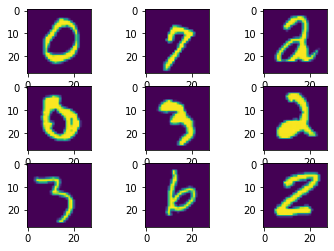

In [4]:
'''
Visualize few images from the dataset
'''
row_number = 3
column_number = 3
inds = np.random.randint(0, 60000, row_number*column_number)
imgs = [mnist_trainset[i][0] for i in inds]
fig, axes = plt.subplots(row_number,column_number)
for i in range(row_number):
    for j in range(column_number):
        axes[i][j].imshow(imgs[i*column_number + j])

In [5]:
'''
Preprocess images to make them numpy arrays for the neural network
YOUR CODE BELLOW
'''
def preprocess_images(dataset):
    '''
    param dataset: MNIST dataset
    
    return parameter should be numpy.array
    '''
    X = []
    Y = []
    for img in dataset:
        X.append(np.array(img[0]).flatten())
        Y.append(np.array(img[1]))    
    X = np.array(X)
    Y = np.array(Y)
    return X, Y

X_trainset, y_trainset = preprocess_images(mnist_trainset)
X_test, y_test = preprocess_images(mnist_testset)

In [6]:
# Check if the preprocessing done correct
assert X_trainset.shape == (60000, 784)
assert y_trainset.shape == (60000,)
assert X_test.shape == (10000, 784)
assert y_test.shape == (10000,)

# Define your model

You need to create 2 layer fully connected neural network. Activation function will be ReLU.

In [7]:
from neural_net import TwoLayerNet
from time import time

In [8]:
'''
You need to define your parameters for your network
YOUR CODE BELLOW
'''
input_size = 784
hidden_size = 100
output_size = 10

nn_model = TwoLayerNet(input_size, hidden_size, output_size)

# Train model

Below you will start to train your model

In [9]:
'''
YOUR CODE BELLOW
'''
def train_val_split(X, y, ratio=0.8):
    '''
    param X: trainset features
    param y: trainset labels
    param ratio: Train-val split ratio
    
    return splitted matricies as numpy.array's
    '''
    X_train, y_train, X_val, y_val = None, None, None, None
    split_idx = int(X.shape[0]*0.8)
    X_train = X[:split_idx, :]
    y_train = y[:split_idx]
    X_val = X[split_idx:, :]
    y_val = y[split_idx:]
    
    return X_train, y_train, X_val, y_val

In [10]:
 X_train, y_train, X_val, y_val = train_val_split(X_trainset, y_trainset)

In [11]:
print(X_train.shape)

(48000, 784)


In [14]:
learning_rate = 1e-4
batch_size = 10
num_iters = 60000

In [15]:
t1 = time()
results = nn_model.train(X_train, y_train, X_val, y_val, learning_rate, batch_size, num_iters)
t2 = time()
print(f'It took {t2-t1} seconds to train model')

Iteration 100 / 60000 : 0.11763303106008159
Iteration 200 / 60000 : 0.11569264007463971
Iteration 300 / 60000 : 0.1579226951805435
Iteration 400 / 60000 : 0.2660262454183465
Iteration 500 / 60000 : 0.15297372883327165
Iteration 600 / 60000 : 0.1438791488972375
Iteration 700 / 60000 : 0.13592775240561786
Iteration 800 / 60000 : 0.3415618466060847
Iteration 900 / 60000 : 0.23581591943218924
Iteration 1000 / 60000 : 0.13431527962767809
Iteration 1100 / 60000 : 0.35897419653664475
Iteration 1200 / 60000 : 0.344808493079188
Iteration 1300 / 60000 : 0.2148965830931166
Iteration 1400 / 60000 : 0.1276539979633998
Iteration 1500 / 60000 : 0.18244538849933223
Iteration 1600 / 60000 : 0.11972594365300213
Iteration 1700 / 60000 : 0.1194799535811207
Iteration 1800 / 60000 : 0.21167927919640128
Iteration 1900 / 60000 : 0.41587979665552033
Iteration 2000 / 60000 : 0.13837493602925494
Iteration 2100 / 60000 : 0.1435860492740365
Iteration 2200 / 60000 : 0.12964638272747098
Iteration 2300 / 60000 : 0.19

# Results

Lets plot loss, train accuracy and validation accuracy

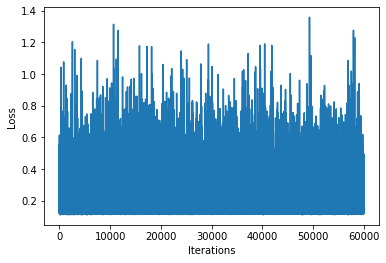

In [16]:
plt.plot(np.arange(len(results['loss_history'])), results['loss_history'])
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.show()

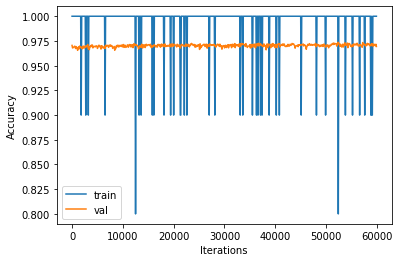

In [17]:
plt.plot(np.arange(len(results['train_acc_history']))*100, results['train_acc_history'],label='train')
plt.plot(np.arange(len(results['val_acc_history']))*100, results['val_acc_history'], label='val')
plt.xlabel("Iterations")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Test model

Finally we can test trained model on test dataset

In [18]:
y_pred = nn_model.predict(X_test)
test_acc = (y_pred == y_test).mean()*100
print(f'Your model test accuracy is : {test_acc}%')

Your model test accuracy is : 97.0%
